## Homework Assignment for SCPY 437
### Turn in this file with your answers using the submission link in the class website by noon of Jan 22, 2026.

Generate the data using the following code. Implement the SGD algorithm to estimate the parameters a, b from the data x, y. Use a fixed learning rate for every iteration in your code. For each learning rate stored in variable <code>alpha</code> generated in the below code, compute the norm of the residual vector after 100 epochs. Plot the residual norms against the learning rates using function <code>semilogx()</code>. What is the optimal learning rate and the smallest residual norm? Do the values of the optimal learning rate and the smallest residual norm change if you rerun your code? If there is a change, please provide an explanation.

\* Please note that I personally opted for a log-log graph instead of a semi-log graph because it is easier to visualize.

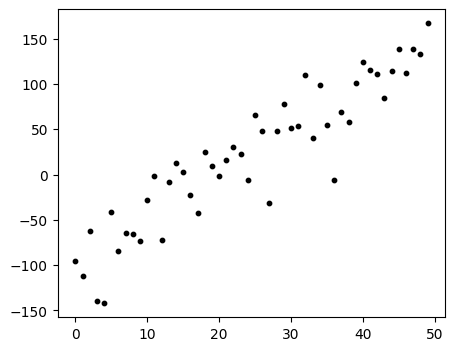

In [26]:
import numpy as np
import matplotlib.pyplot as plt

a = 5; b = -100;    # true model parameters
D = 50              # number of data points
x = np.arange(D)
y = a*x+b + 30*np.random.randn(D)
alpha = np.power(10, np.arange(-5,-2.8,0.1))   # step lengths/learning rates

# Plotting visualization
plt.figure(figsize=(5,4))
plt.scatter(x,y, color='black', s=10); plt.show()

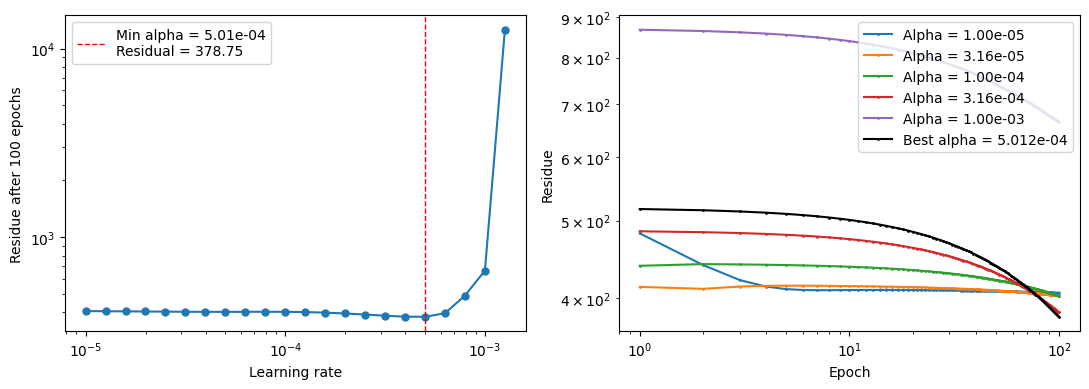

== BEST FIT PARAMETER REPORT ==
a: {4.348344843174112}
b: {-39.75118079829162}


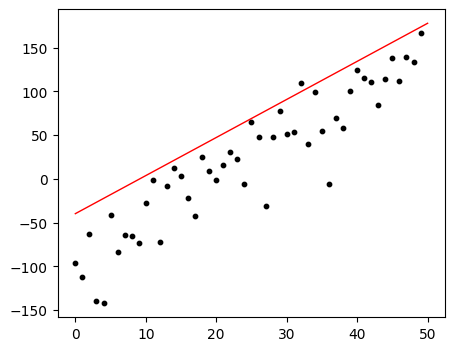

In [27]:
# SGD algorithm: Set up design matrices Am = d,
# fit for m with least norm(r) where r = Am - d
A = np.array([x, np.ones_like(x)]).T
d = y.T
# Initial guess of model m: y = ax + b:
m0 = np.array([0, 0])

n_epochs = 100
iterations = len(x) # Iterations per epoch
n_alpha = len(alpha)
# Blank arrays for SDG report graph
As = np.zeros((n_alpha, n_epochs))
Bs = As.copy()
RESs = As.copy()

# For loop iterative algorithm for all learning rate alphas
for a_idx, a in enumerate(alpha):
    m = m0.copy() # Reset m for each alpha
    for e in range(n_epochs):
        for i in range(iterations):
            ai, bi = m
            xi, yi = x[i], y[i]
            ri = ai*xi + bi - yi
            gi = np.array([xi*ri, ri])
            m = m - a*gi
        
        res = np.linalg.norm(d - A @ m)
        As[a_idx, e], Bs[a_idx, e], RESs[a_idx, e] = m[0], m[1], res

# Plot
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
res_at_100epoch = RESs[:,-1]
best_alpha = alpha[np.argmin(res_at_100epoch)]

axs[0].loglog(alpha, res_at_100epoch, marker='o', ms=5)
label_text = f'Min alpha = {best_alpha:.2e}\nResidual = {np.min(res_at_100epoch):.2f}'
axs[0].axvline(best_alpha, color='red', lw=1, ls='--', label=label_text)
axs[0].set_xlabel('Learning rate')
axs[0].set_ylabel('Residue after 100 epochs')
axs[0].legend(loc='upper left')

for a_idx, a in enumerate(alpha[::5]):
    axs[1].loglog(np.arange(n_epochs)+1, RESs[a_idx*5,:], marker='o', color=f'C{a_idx}', ms=1,
                 label=f'Alpha = {a:.2e}')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Residue')

axs[1].loglog(np.arange(n_epochs)+1, RESs[np.argmin(res_at_100epoch),:],
             marker='o', color=f'black', ms=1, label=f'Best alpha = {best_alpha:.3e}')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

print('== BEST FIT PARAMETER REPORT ==')
best_a, best_b = As[np.argmin(res_at_100epoch),-1], Bs[np.argmin(res_at_100epoch),-1]
print('a:', {best_a})
print('b:', {best_b})

# Plotting visualization
plt.figure(figsize=(5,4))
plt.scatter(x,y, color='black', s=10)
X = np.linspace(0,D,100)
plt.plot(X, best_a*X + best_b, color='red', lw=1)
plt.show()

**What is the optimal learning rate and the smallest residual norm?**

<code>5.01e-4</code> and <code>378.15</code> respectively (See above graphs)

**Do the values of the optimal learning rate and the smallest residual norm change if you rerun your code?**

No, if the simulated data was not changed.

BUT, the values change drastically if the noise in the simulated data was changed. This is because the SDG algorithm only ran for 100 epochs, which is found to be **not enough** to converge to the true fit (see BEST FIT PARAMETER REPORT and the corresponding graph). Not graphed in this work, but by changing the <code>n_epochs</code> variable to 1000 from 100, the correct model fit parameters are consistently achieved.

**Submitted by: Chatdanai Sawangwong 6505066**